<a href="https://colab.research.google.com/github/sharonapa/naya-ds-course/blob/main/NAYA_DS_project2_EDA_loan_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA project On Bank loans status
https://www.kaggle.com/datasets/zaurbegiev/my-dataset


<p>By: Yuval Levi , Sharon Napadenski

June 2023

## imports

In [ ]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
sns.set_theme()
%matplotlib inline

# Dataset

## kaggle download

### get kaggle key from your drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
# copy your kaggle token from drive to this local notebook
!cp /content/drive/MyDrive/Master_deg/kaggle.json  ~/.kaggle/kaggle.json

### kaggle key params

In [ ]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"XXX","key":"YYY"}
# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

### download dataset

In [ ]:
!kaggle datasets download -d zaurbegiev/my-dataset
!unzip -o /content/my-dataset.zip

 74% 6.00M/8.14M [00:00<00:00, 57.3MB/s]
100% 8.14M/8.14M [00:00<00:00, 62.5MB/s]
Archive:  /content/my-dataset.zip
  inflating: credit_test.csv         
  inflating: credit_train.csv        


# dataframe load

In [ ]:
data_file = "credit_train.csv"
df_credit_train = pd.read_csv(data_file)
df_credit_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# EDA

## show columns names and types
100,514 records

19 features

In [ ]:
df_credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
df_credit_train[df_credit_train.duplicated()].head()
df_credit_train[df_credit_train['Loan ID']=="a1301a8a-e66e-4747-beb7-c2f243f2c689"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
418,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0
420,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0


show and remove duplicates

In [ ]:
print(f'number of duplicate rows: {df_credit_train.duplicated().sum()}')
df_credit_train.drop_duplicates(inplace = True)
df_credit_train.shape

number of duplicate rows: 10728


(89786, 19)

In [ ]:
df_credit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89786 entries, 0 to 100000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       89785 non-null  object 
 1   Customer ID                   89785 non-null  object 
 2   Loan Status                   89785 non-null  object 
 3   Current Loan Amount           89785 non-null  float64
 4   Term                          89785 non-null  object 
 5   Credit Score                  70631 non-null  float64
 6   Annual Income                 70631 non-null  float64
 7   Years in current job          85983 non-null  object 
 8   Home Ownership                89785 non-null  object 
 9   Purpose                       89785 non-null  object 
 10  Monthly Debt                  89785 non-null  float64
 11  Years of Credit History       89785 non-null  float64
 12  Months since last delinquent  41448 non-null  float64
 13  

## Features type

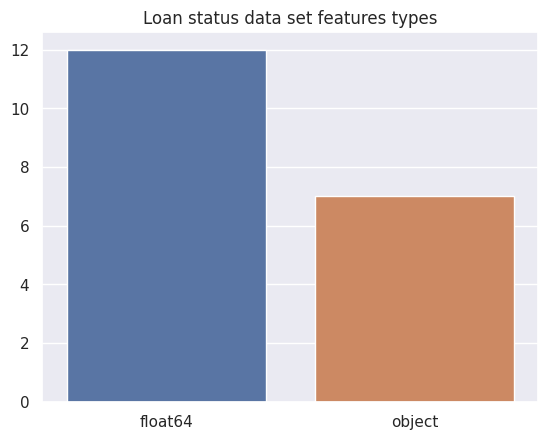

In [ ]:
data_types = df_credit_train.dtypes.value_counts()
sns.barplot(x=data_types.index,y= data_types.values).set_title('Loan status data set features types');

## missing values

In [ ]:
missing_val_series = df_credit_train.isna().sum()  / len(df_credit_train)
missing_val_series

Loan ID                         0.000011
Customer ID                     0.000011
Loan Status                     0.000011
Current Loan Amount             0.000011
Term                            0.000011
Credit Score                    0.213341
Annual Income                   0.213341
Years in current job            0.042356
Home Ownership                  0.000011
Purpose                         0.000011
Monthly Debt                    0.000011
Years of Credit History         0.000011
Months since last delinquent    0.538369
Number of Open Accounts         0.000011
Number of Credit Problems       0.000011
Current Credit Balance          0.000011
Maximum Open Credit             0.000033
Bankruptcies                    0.002127
Tax Liens                       0.000111
dtype: float64

### missing values plot

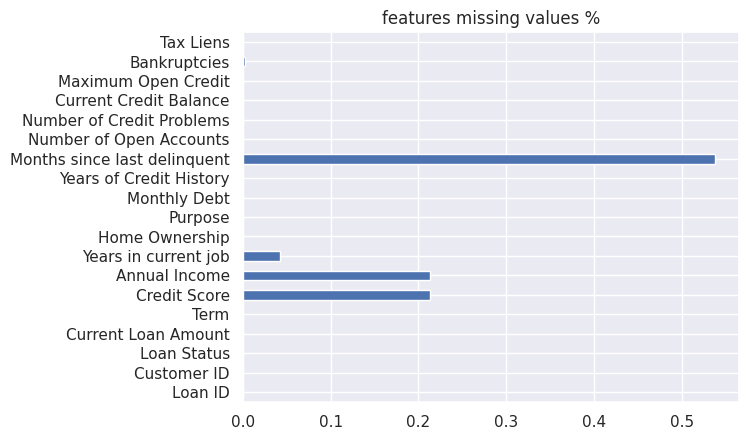

In [ ]:
missing_val_series.plot(kind='barh',title='features missing values %');

## variable data statistics

we can see 'Current loan amount' has 99999999 values

In [ ]:
df_credit_train_describe = df_credit_train.describe().apply(lambda x: x.apply('{0:.0f}'.format)).T
df_credit_train_describe


,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,89785,13060895,33295560,10802,180268,313874,532378,99999999
Credit Score,70631,1131,1571,585,708,729,742,7510
Annual Income,70631,1375894,1104852,76627,847932,1168975,1648915,165557393
Monthly Debt,89785,18397,12145,0,10157,16140,23919,435843
Years of Credit History,89785,18,7,4,14,17,22,70
Months since last delinquent,41448,35,22,0,16,32,51,176
Number of Open Accounts,89785,11,5,0,8,10,14,76
Number of Credit Problems,89785,0,0,0,0,0,0,15
Current Credit Balance,89785,294035,372228,0,112936,209722,367517,32878968
Maximum Open Credit,89783,775657,8803517,0,277068,472692,791450,1539737892


## loan status

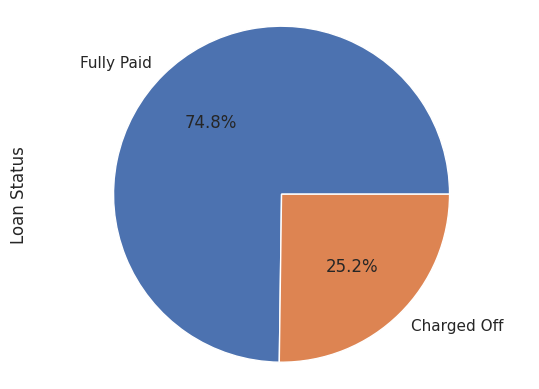

In [ ]:
df_credit_train['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal');

Let's see in which loans the bank lost his money

Text(0.5, 1.0, 'Charged off loan by purpose')

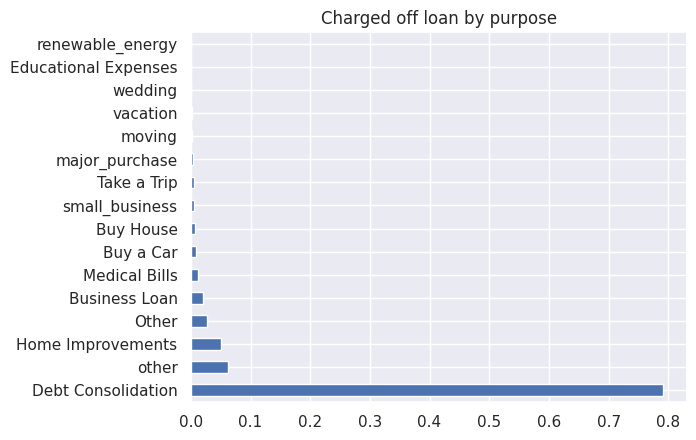

In [ ]:
df_credit_train_chrg_off = df_credit_train[df_credit_train['Loan Status'] == 'Charged Off']

df_credit_train_chrg_off['Purpose'].value_counts(normalize=True).plot.barh().set_title('Charged off loan by purpose')

show type of loans - we can see short term is the majority

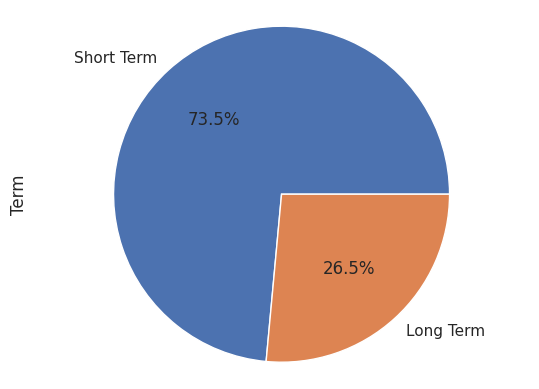

In [ ]:
df_credit_train['Term'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal');

## show distribution of the 'Current Loan Amount' feature

- majority of loans took are around (0 - 10,000,000]
- we can see a right tail at 90,000,000 (this is the outlier data)

In [ ]:
0.1*1e8

10000000.0

<Axes: xlabel='Current Loan Amount', ylabel='Count'>

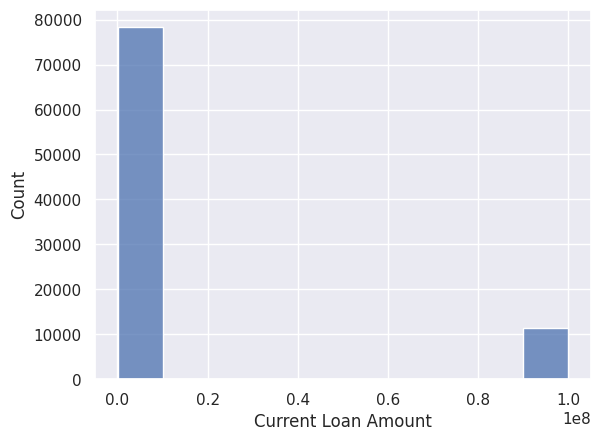

In [ ]:
sns.histplot(data=df_credit_train, x="Current Loan Amount",bins= 10)

[Text(0.5, 1.0, 'Density plot')]

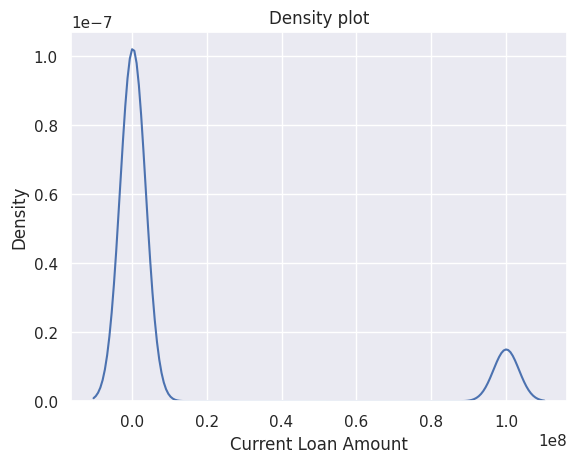

In [ ]:
sns.kdeplot(data=df_credit_train, x="Current Loan Amount").set(title='Density plot')

after removing the right tail , we can see loans are grouped at :
200K,400K, etc.

[Text(0.5, 1.0, 'Density plot (no edges)')]

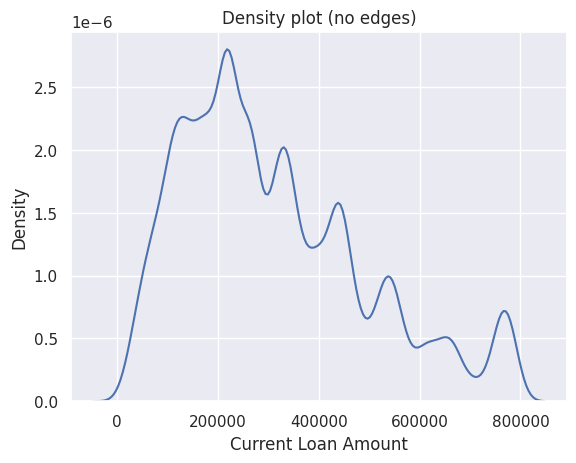

In [ ]:
sns.kdeplot(df_credit_train[df_credit_train['Current Loan Amount']<90_000_000]['Current Loan Amount']).set(title='Density plot (no edges)')

## Relation between "Years in job" and "Loan status"

In [ ]:
df_credit_train['Years in current job'].value_counts()

10+ years    27755
2 years       8254
< 1 year      7365
3 years       7339
5 years       6136
1 year        5832
4 years       5511
6 years       5134
7 years       4989
8 years       4121
9 years       3547
Name: Years in current job, dtype: int64

In [ ]:
df_credit_train['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [ ]:
df_credit_train.groupby('Years in current job')['Loan Status'].value_counts(normalize=True)

Years in current job  Loan Status
1 year                Fully Paid     0.743999
                      Charged Off    0.256001
10+ years             Fully Paid     0.757737
                      Charged Off    0.242263
2 years               Fully Paid     0.757451
                      Charged Off    0.242549
3 years               Fully Paid     0.764273
                      Charged Off    0.235727
4 years               Fully Paid     0.750318
                      Charged Off    0.249682
5 years               Fully Paid     0.750326
                      Charged Off    0.249674
6 years               Fully Paid     0.742891
                      Charged Off    0.257109
7 years               Fully Paid     0.741632
                      Charged Off    0.258368
8 years               Fully Paid     0.744965
                      Charged Off    0.255035
9 years               Fully Paid     0.734423
                      Charged Off    0.265577
< 1 year              Fully Paid     0.740937


Precentage of loans status for each group

not so much diffrence between groups

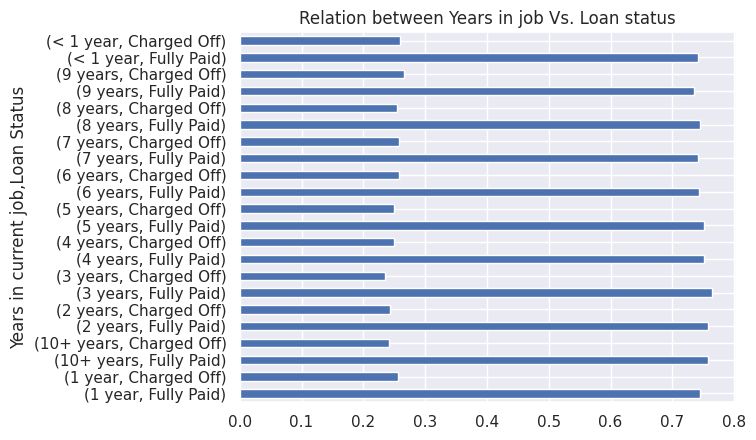

In [ ]:
ax = df_credit_train.groupby('Years in current job')['Loan Status'].value_counts(normalize=True).plot.barh()
ax.set_title('Relation between Years in job Vs. Loan status');

## Corrleation map

we can see features like monthly debt and annual income are highly correlated.

meaning : high income people can return high amount of debt

<ipython-input-51-b3e71dfcfffa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_credit_train.corr(),annot=True,annot_kws={"fontsize": 16})


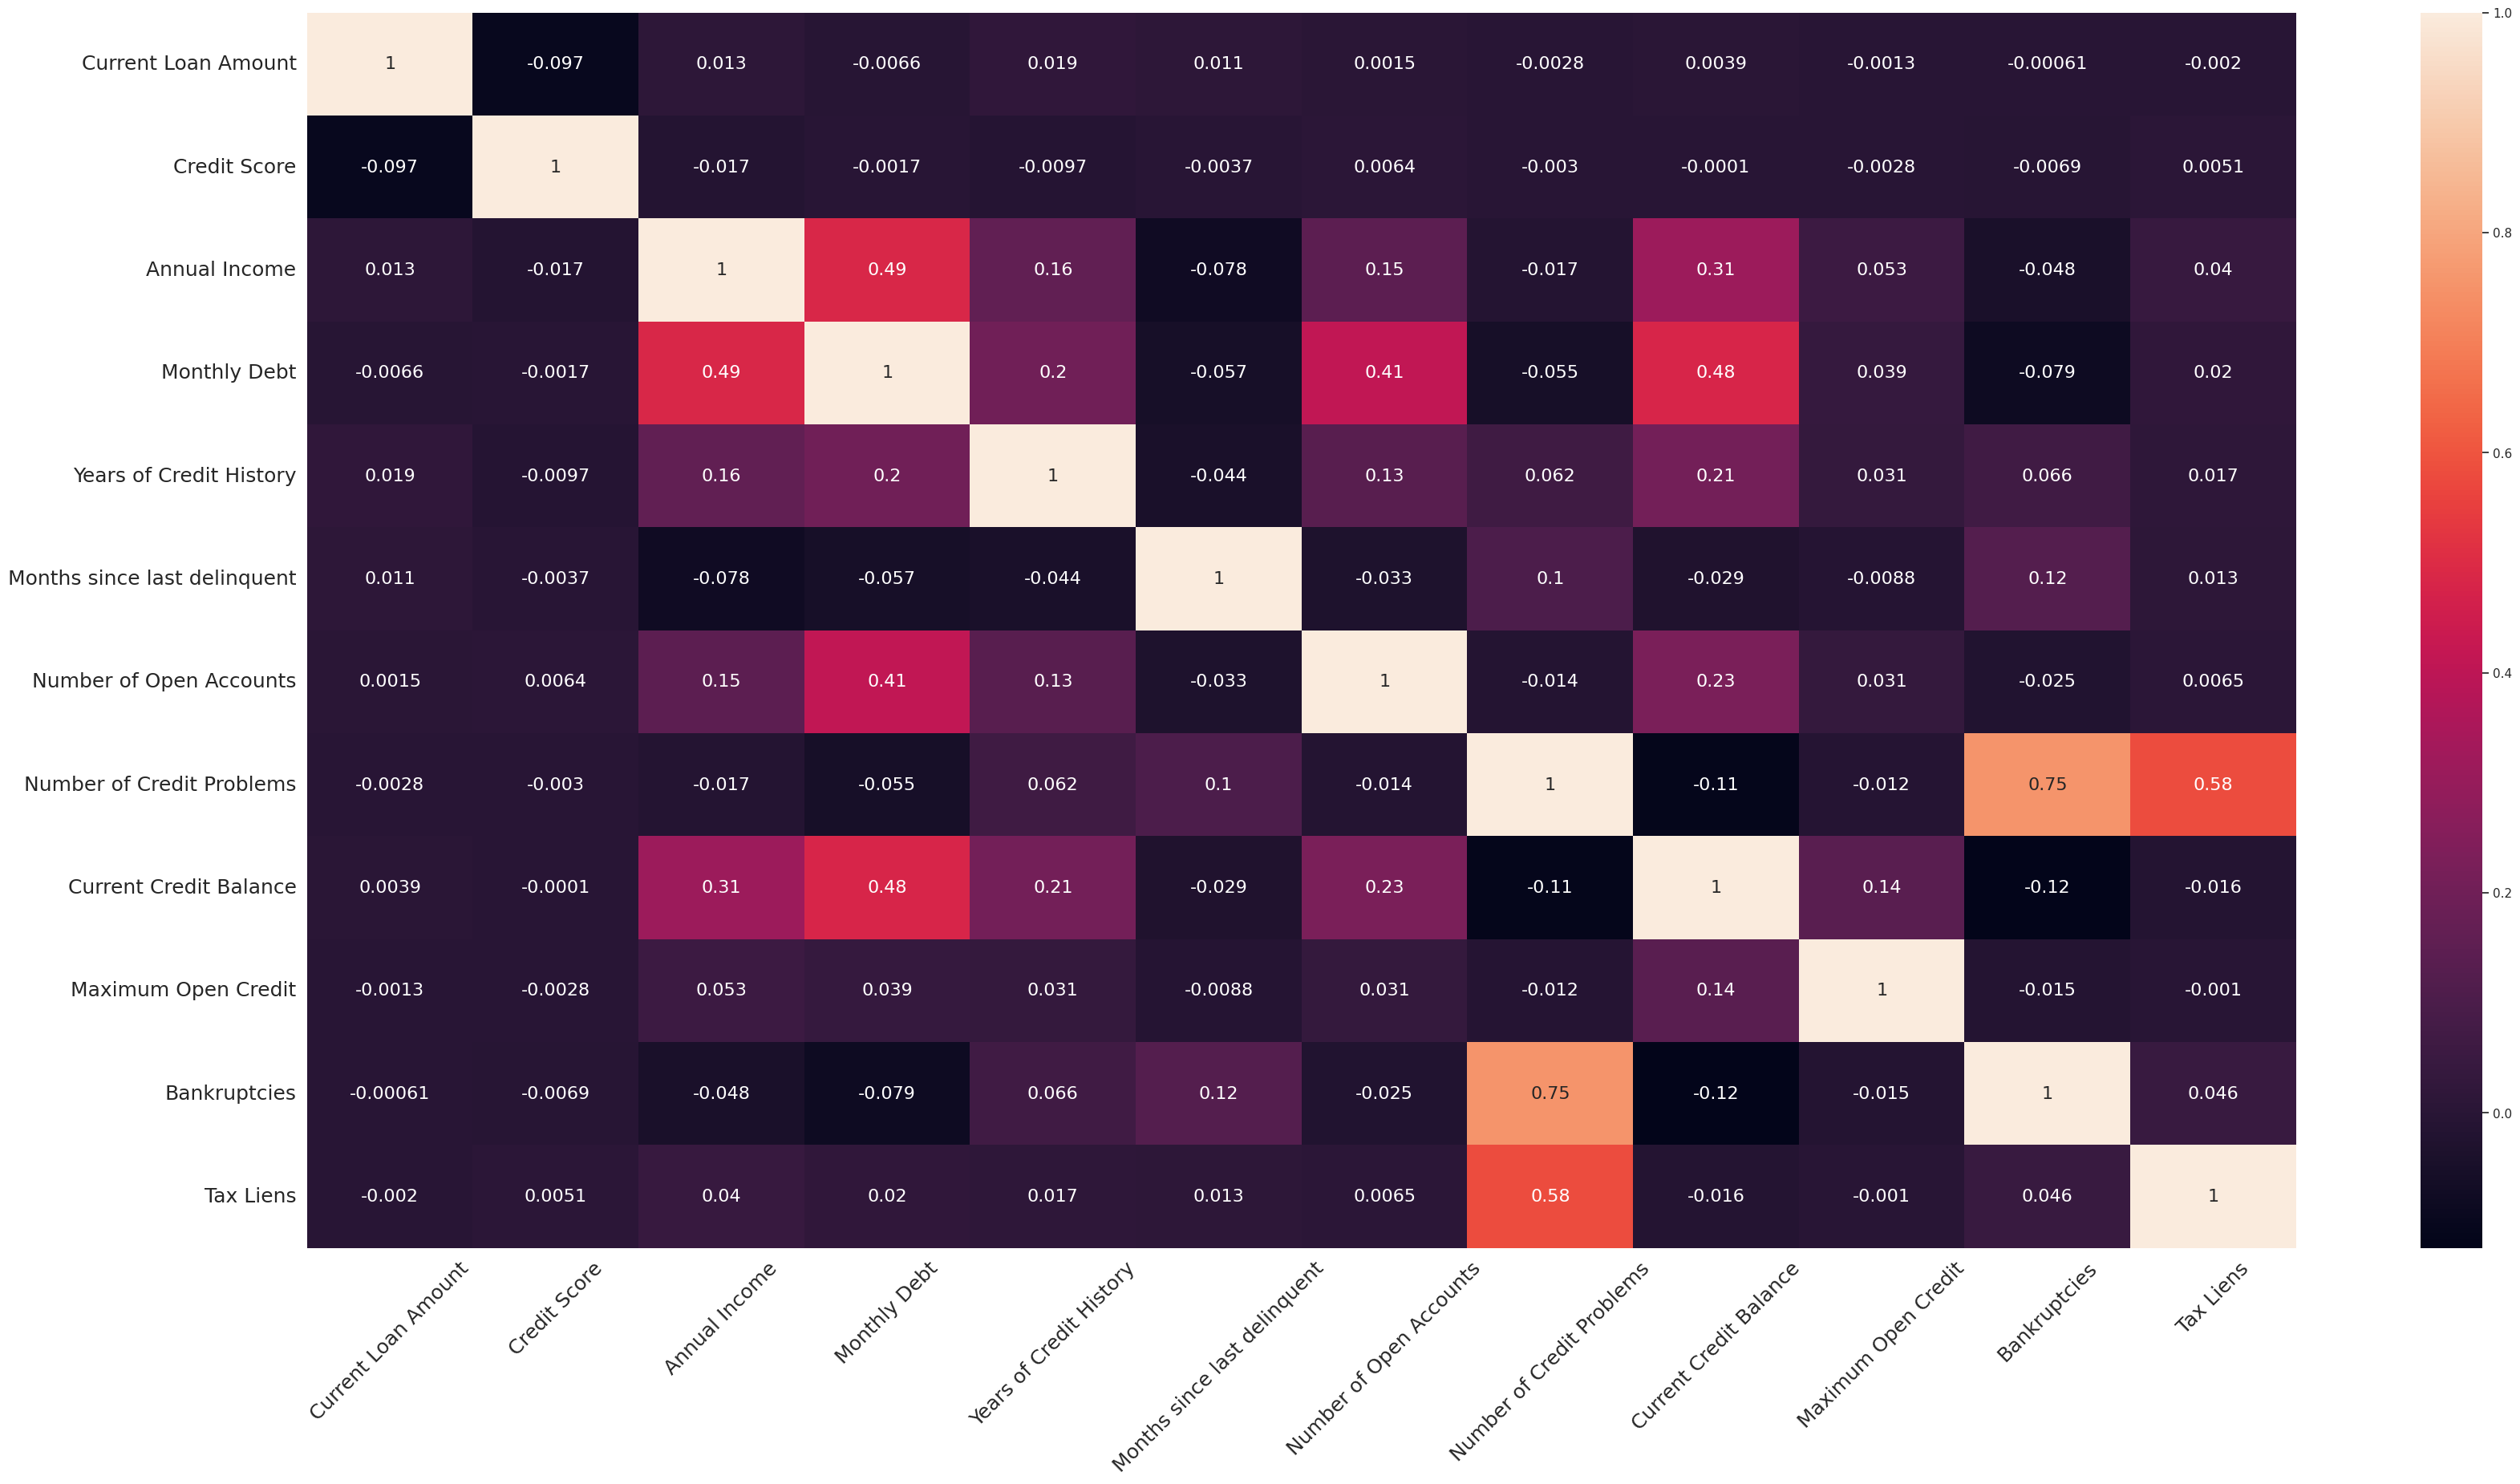

In [ ]:
plt.figure(figsize=(40,20))
ax = sns.heatmap(df_credit_train.corr(),annot=True,annot_kws={"fontsize": 16})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

which loan purpose has most loan money , and the bank can invest (ads, intrests) more in those areas

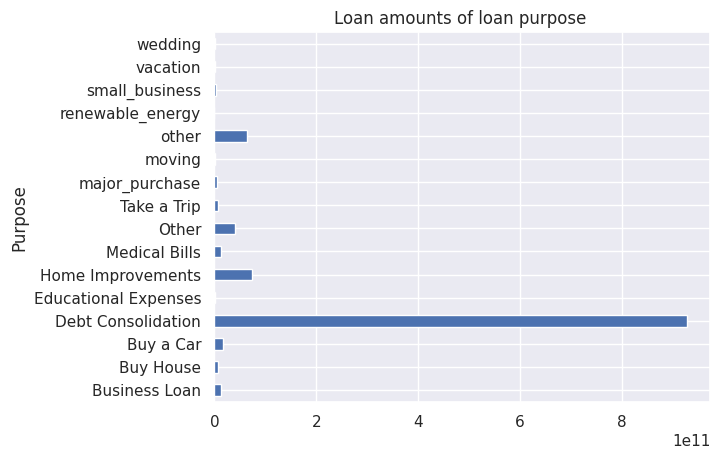

In [ ]:
df_credit_train.groupby('Purpose')['Current Loan Amount'].sum().plot.barh().set_title('Loan amounts of loan purpose ');

## loan purpose by annual income

- high income people take more "home improve" loans
- low income (students) take more educational loans

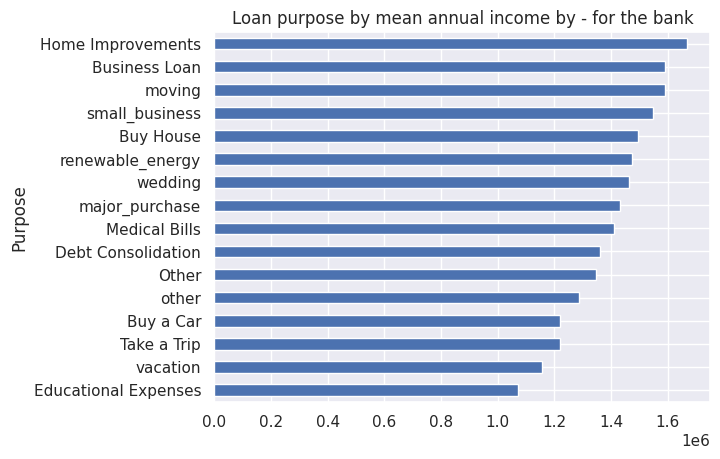

In [ ]:

df_credit_train.groupby(['Purpose'])['Annual Income'].mean() \
                                                    .sort_values(ascending=True) \
                             .plot.barh() \
                             .set_title('Loan purpose by mean annual income by - for the bank');

